In [2]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [3]:
df1 = pd.read_csv('MagicBricks.csv')

In [4]:
df1.head(1)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN


In [5]:
df1.shape

(1259, 11)

In [6]:
df1.head(3)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0


In [7]:
df1.groupby('Status')['Status'].agg('count')

Status
Almost_ready       75
Ready_to_move    1184
Name: Status, dtype: int64

In [8]:
df2 = df1.drop(['Status','Bathroom','Transaction'],axis='columns')

In [9]:
df2.head(3)

,Area,BHK,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Semi-Furnished,Rohini Sector 25,1.0,6500000,Builder_Floor,NaN
1,750.0,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0


In [10]:
df2.isnull().sum()

Area            0
BHK             0
Furnishing      5
Locality        0
Parking        33
Price           0
Type            5
Per_Sqft      241
dtype: int64

In [11]:
df3 = df2.dropna(subset=['Furnishing', 'Parking'])

In [12]:
df3.isnull().sum()

Area            0
BHK             0
Furnishing      0
Locality        0
Parking         0
Price           0
Type            0
Per_Sqft      220
dtype: int64

In [13]:
mean_perSqft = df3['Per_Sqft'].mean()
df3['Per_Sqft'].fillna(value=mean_perSqft)

0       15663.630846
1        6667.000000
2        6667.000000
3        6667.000000
4        6667.000000
            ...     
1254    12916.000000
1255    12916.000000
1256    12916.000000
1257    12916.000000
1258    12916.000000
Name: Per_Sqft, Length: 1225, dtype: float64

In [14]:
df3.isnull().sum()

Area            0
BHK             0
Furnishing      0
Locality        0
Parking         0
Price           0
Type            0
Per_Sqft      220
dtype: int64

In [15]:
df3.head(3)

,Area,BHK,Furnishing,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Semi-Furnished,Rohini Sector 25,1.0,6500000,Builder_Floor,NaN
1,750.0,2,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0


In [16]:
df3.dtypes

Area          float64
BHK             int64
Furnishing     object
Locality       object
Parking       float64
Price           int64
Type           object
Per_Sqft      float64
dtype: object

In [17]:
df4 = df3.drop(['Furnishing'],axis='columns')

In [18]:
df4.head(3)

,Area,BHK,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Rohini Sector 25,1.0,6500000,Builder_Floor,NaN
1,750.0,2,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Apartment,6667.0


In [19]:
df4.dtypes

Area        float64
BHK           int64
Locality     object
Parking     float64
Price         int64
Type         object
Per_Sqft    float64
dtype: object

In [20]:
len(df['Locality'].unique())
#dimensionality curse

NameError: name 'df' is not defined

In [21]:
df4.Locality = df4.Locality.apply(lambda x: x.strip())
locality_stats = df4.groupby('Locality')['Locality'].agg('count').sort_values(ascending = False)
locality_stats

Locality
Lajpat Nagar 3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       33
Lajpat Nagar 2                                                                                                                                                                                                                                                                                                                                         

In [22]:
len(locality_stats[locality_stats <=3])

273

In [23]:
 locality_stats_under_3 = locality_stats[locality_stats <=3]

In [24]:
 len(df['Locality'].unique())

NameError: name 'df' is not defined

In [25]:
df4.Locality = df4.Locality.apply(lambda x: 'other' if x in  locality_stats_under_3 else x)

In [26]:
df4.head()

,Area,BHK,Locality,Parking,Price,Type,Per_Sqft
0,800.0,3,Rohini Sector 25,1.0,6500000,Builder_Floor,NaN
1,750.0,2,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Apartment,6667.0
2,950.0,2,other,1.0,15500000,Apartment,6667.0
3,600.0,2,Rohini Sector 24,1.0,4200000,Builder_Floor,6667.0
4,650.0,2,other,1.0,6200000,Builder_Floor,6667.0


In [27]:
len(df4['Locality'].unique())

81

In [28]:
df4[df4.Area/df4.BHK<100].head()

,Area,BHK,Locality,Parking,Price,Type,Per_Sqft
28,28.0,2,Rohini Sector 25,1.0,5000000,Apartment,8750.0
153,100.0,3,Budh Vihar Phase 1,1.0,4300000,Builder_Floor,43000.0
157,75.0,2,Budh Vihar,1.0,3000000,Builder_Floor,40000.0
238,45.0,4,"Batla House, Okhla",1.0,5500000,Builder_Floor,18750.0
341,70.0,1,"Yamuna Vihar, Shahdara",1.0,4500000,Apartment,5357.0


In [29]:
#we need to remove outliers

In [30]:
df4.shape

(1225, 7)

In [31]:
df5 = df4[~(df4.Area/df4.BHK<100)]

In [32]:
df5.shape

(1200, 7)

In [33]:
df5.Per_Sqft.describe()

count       980.000000
mean      15358.033673
std       20510.904093
min        1259.000000
25%        6343.500000
50%       11165.500000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

In [34]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('Locality'):
        m = np.mean(subdf.Per_Sqft)
        st = np.std(subdf.Per_Sqft)
        reduced_df = subdf[(subdf.Per_Sqft>(m-st))&(subdf.Per_Sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [35]:
df6 = remove_pps_outliers(df5)

In [36]:
df6.shape

(760, 7)

In [37]:
def plot_scatter_chart(df,Locality):
    bhk2 = df[(df.Locality==Locality) & (df.BHK==2)]
    bhk3 = df[(df.Locality==Locality) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.Price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.Area,bhk3.Price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet area")
    plt.ylabel("Price")
    plt.title(Locality)
    plt.legend()

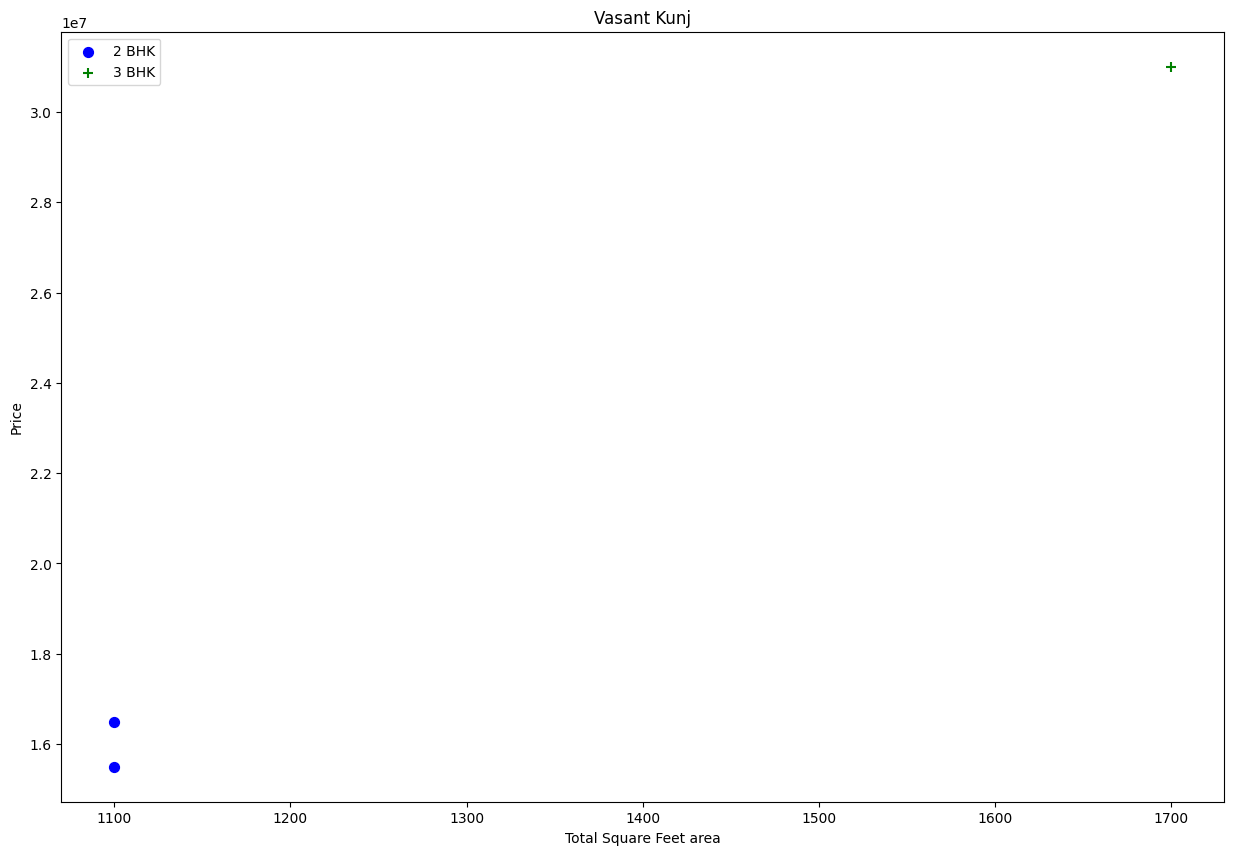

In [38]:
plot_scatter_chart(df6,'Vasant Kunj')

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for locality, locality_df in df.groupby('Locality'):
        bhk_stats = {}
        for bhk, bhk_df in locality_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Per_Sqft),
                'std': np.std(bhk_df.Per_Sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in locality_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Per_Sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(584, 7)

Text(0, 0.5, 'Count')

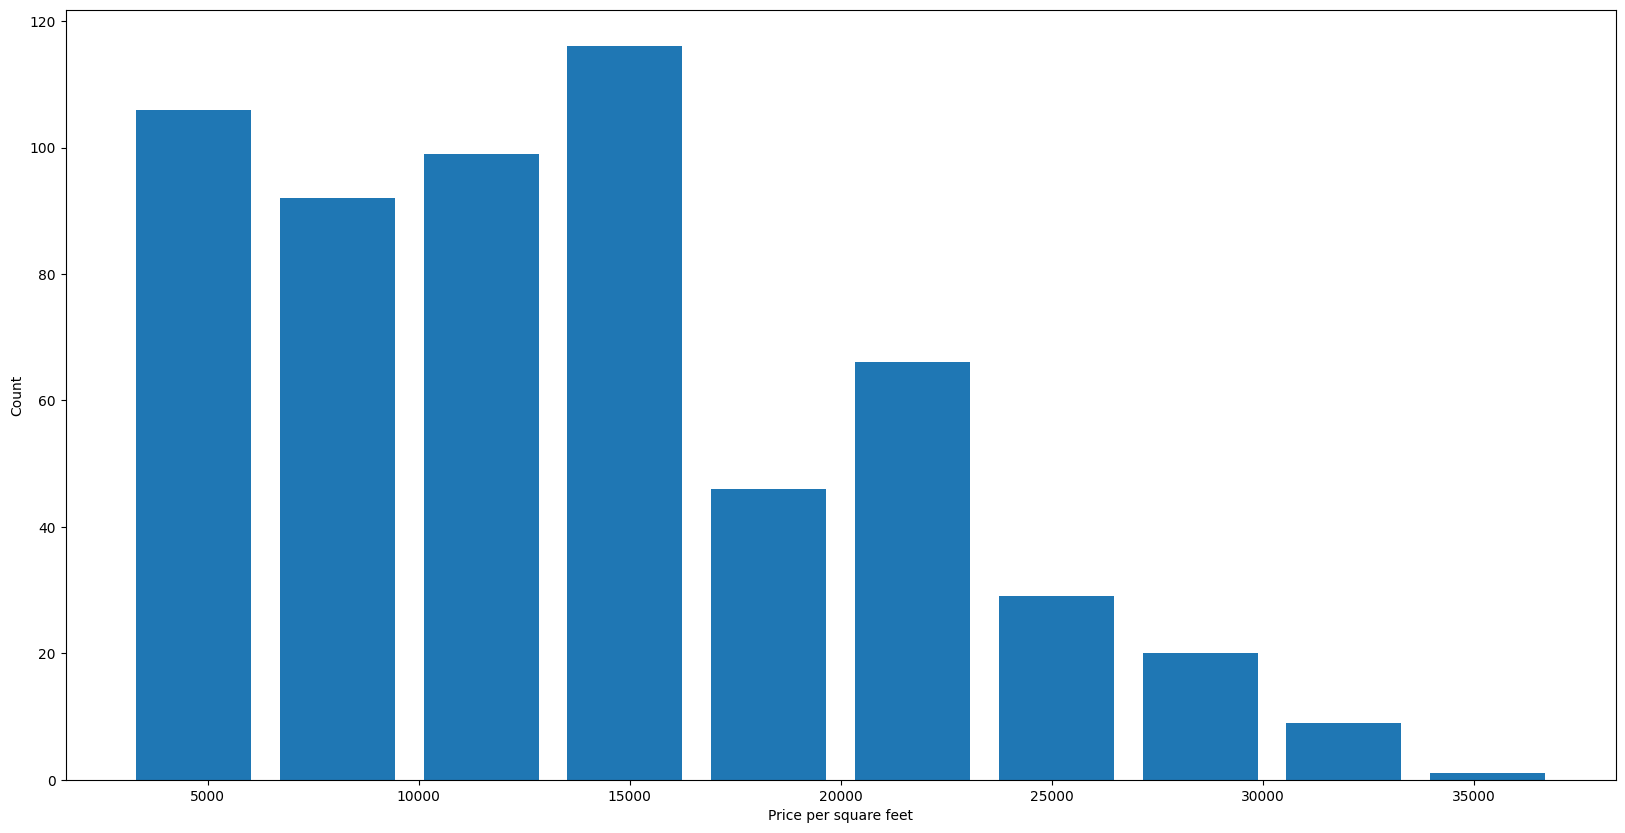

In [40]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df7.Per_Sqft, rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [41]:
df8 = df7.drop(['Area','Per_Sqft'],axis='columns')
df8.head(5)

,BHK,Locality,Parking,Price,Type
0,3,Alaknanda,1.0,19000000,Apartment
1,2,Alaknanda,2.0,15000000,Apartment
2,2,Alaknanda,2.0,17500000,Apartment
3,2,Alaknanda,2.0,14000000,Apartment
4,3,Alaknanda,2.0,15600000,Apartment


In [42]:
df8.shape

(584, 5)

In [43]:
dummies =pd.get_dummies(df8.Locality).astype(int)

In [44]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis = 'columns')

In [45]:
df9.head(10)

,BHK,Locality,Parking,Price,Type,Alaknanda,"Batla House, Okhla",Budh Vihar,Budh Vihar Phase 1,Chittaranjan Park,...,"Shivalik, Malviya Nagar","Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,"Yamuna Vihar, Shahdara"
0,3,Alaknanda,1.0,19000000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Alaknanda,2.0,15000000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Alaknanda,2.0,17500000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,Alaknanda,2.0,14000000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,Alaknanda,2.0,15600000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,Alaknanda,1.0,19000000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,Alaknanda,1.0,3000000,Builder_Floor,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,Alaknanda,1.0,19000000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,Alaknanda,2.0,15000000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,Alaknanda,2.0,17500000,Apartment,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df10 = df9.drop(['Locality','Type'],axis='columns')
df10.head(10)

,BHK,Parking,Price,Alaknanda,"Batla House, Okhla",Budh Vihar,Budh Vihar Phase 1,Chittaranjan Park,"Common Wealth Games Village, Commonwealth Games Village 2010",Commonwealth Games Village 2010,...,"Shivalik, Malviya Nagar","Sukhdev Vihar, Okhla",Sultanpur,Sultanpur Extension,"The Amaryllis, Karol Bagh","The Leela Sky Villas, Patel Nagar",Uttam Nagar,Uttam Nagar West,Vasant Kunj,"Yamuna Vihar, Shahdara"
0,3,1.0,19000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2.0,15000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2.0,17500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2.0,14000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2.0,15600000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,1.0,19000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1.0,3000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,1.0,19000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,2.0,15000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,2.0,17500000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df10.dtypes

BHK                                    int64
Parking                              float64
Price                                  int64
Alaknanda                              int32
Batla House, Okhla                     int32
                                      ...   
The Leela Sky Villas, Patel Nagar      int32
Uttam Nagar                            int32
Uttam Nagar West                       int32
Vasant Kunj                            int32
Yamuna Vihar, Shahdara                 int32
Length: 66, dtype: object

In [48]:
x = df10.drop('Price',axis='columns')
y = df10.Price

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [50]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

-2.296163820403014e+22

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([-7.32336826e+20, -2.82254365e+21, -4.42879951e+21, -6.82892498e+21,
        6.77144888e-01])

In [52]:
x.dtypes

BHK                                    int64
Parking                              float64
Alaknanda                              int32
Batla House, Okhla                     int32
Budh Vihar                             int32
                                      ...   
The Leela Sky Villas, Patel Nagar      int32
Uttam Nagar                            int32
Uttam Nagar West                       int32
Vasant Kunj                            int32
Yamuna Vihar, Shahdara                 int32
Length: 65, dtype: object

In [65]:
def predict_price(Locality,Parking,BHK):    
    loc_index = np.where(x.columns==Locality)[0][0]

    x_input = np.zeros(len(x.columns))
    x_input[0] = BHK
    x_input[1] = Parking
    if loc_index >= 0:
        x_input[loc_index] = 1

    return lr_clf.predict([x_input])[0]

In [66]:
predict_price('Uttam Nagar',1,2)

C:\Users\Pushpa_Rawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83177.89166680351

In [67]:
import pickle
with open('delhi_home_price_prediction_model','wb') as f:
    pickle.dump(lr_clf,f)

In [69]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))